Dataset Download

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
data=pd.read_csv("Maternal Health Risk Data Set.csv")
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


data preprocessing

In [ ]:
data.shape

(1014, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
data=data.drop(data.index[data.HeartRate==7])

In [ ]:
X=data.drop("RiskLevel", axis=1)

y=data.RiskLevel

x_train, x_test, y_train, y_test=split(X, y, test_size=0.2, random_state=1)

descriptive analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1012 non-null   int64  
 1   SystolicBP   1012 non-null   int64  
 2   DiastolicBP  1012 non-null   int64  
 3   BS           1012 non-null   float64
 4   BodyTemp     1012 non-null   float64
 5   HeartRate    1012 non-null   int64  
 6   RiskLevel    1012 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 63.2+ KB


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1012.0,NaN,NaN,NaN,29.899209,13.47356,10.0,19.0,26.0,39.0,70.0
SystolicBP,1012.0,NaN,NaN,NaN,113.184783,18.419618,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1012.0,NaN,NaN,NaN,76.463439,13.899372,49.0,65.0,80.0,90.0,100.0
BS,1012.0,NaN,NaN,NaN,8.727619,3.296583,6.0,6.9,7.5,8.0,19.0
BodyTemp,1012.0,NaN,NaN,NaN,98.666403,1.372421,98.0,98.0,98.0,98.0,103.0
HeartRate,1012.0,NaN,NaN,NaN,74.434783,7.521857,60.0,70.0,76.0,80.0,90.0
RiskLevel,1012,3,low risk,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN


VISUAL ANALYTICS
univariate analysis


In [ ]:
def num_plot(data, col):
  fig, ax = plt.subplots(1, 2, figsize=(10, 6))
  sns.histplot(data=data, x=col, kde=True, ax=ax[0])
  sns.boxplot(data=data, x=col, ax=ax[1])
  ax[0].set_title(f"{col} Distribution Histogram")
  ax[1].set_title(f"{col} Distribution boxplot")
  plt.show()

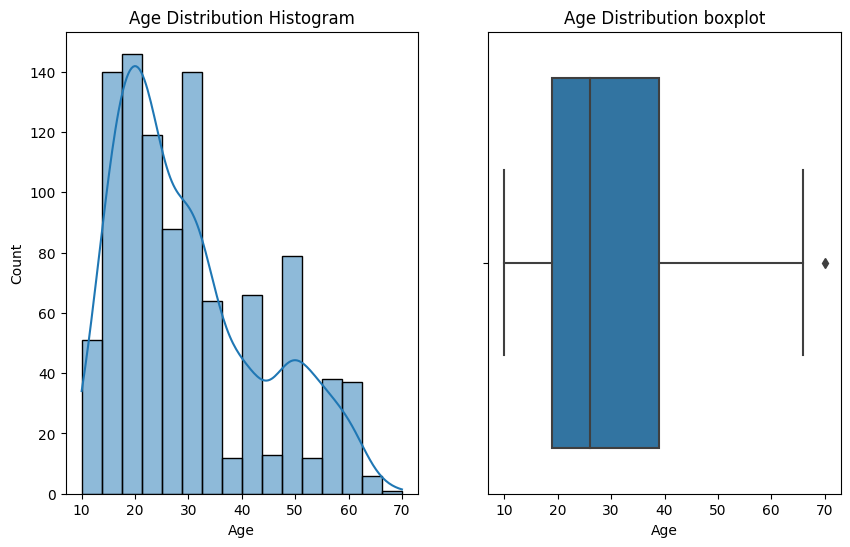

In [ ]:
num_plot(data,"Age")

bivariant


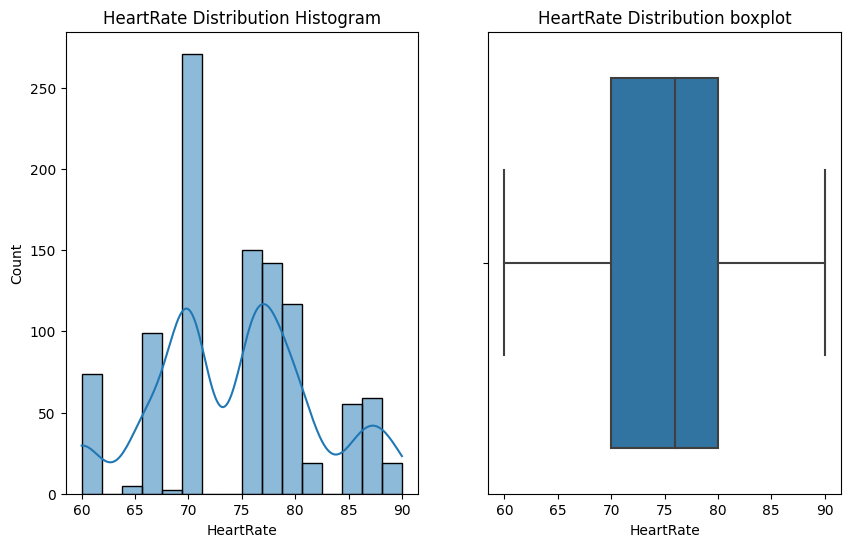

In [ ]:
num_plot(data,'HeartRate')

multivarient

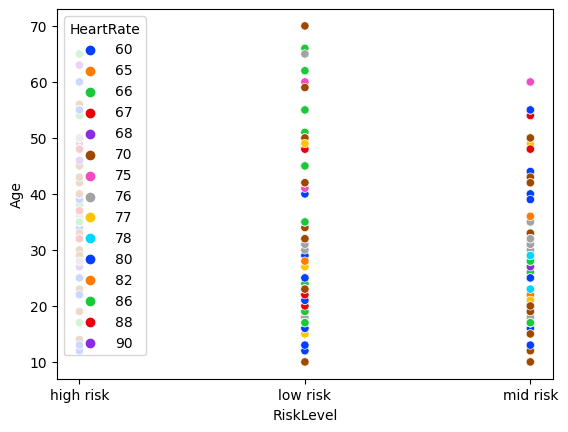

In [ ]:
sns.scatterplot(x='RiskLevel',y='Age',  data=data,palette='bright',hue='HeartRate');

Training The Model In Multiple Algorithms

In [ ]:
#Decision tree model
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_train_pred=dt.predict(x_train)
dt_test_pred=dt.predict(x_test)
train_acc=accuracy_score (y_train,dt_train_pred)
test_acc=accuracy_score (y_test, dt_test_pred)
print("accuracy of DecisionTreeClassifier")
print("Training accuracy:{} ".format(train_acc))
print("Testing accuracy: {}".format (test_acc))


accuracy of DecisionTreeClassifier
Training accuracy:0.9247842170160296 
Testing accuracy: 0.8669950738916257


In [ ]:
#KNN model
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_train_pred=knn.predict(x_train)
knn_test_pred=knn.predict(x_test)
train_acc=accuracy_score (y_train, knn_train_pred)
test_acc=accuracy_score (y_test, knn_test_pred)
print("accuracy of KNeighborsClassifier")
print("Training accuracy: {}".format (train_acc))
print("Testing accuracy:{}".format(test_acc))

accuracy of KNeighborsClassifier
Training accuracy: 0.7854500616522812
Testing accuracy:0.6995073891625616


In [ ]:
#SVC model
svm =SVC()
svm.fit(x_train,y_train)
svm_train_pred = svm.predict(x_train)
svm_test_pred = svm.predict(x_test)
train_acc = accuracy_score (y_train, svm_train_pred)
test_acc = accuracy_score (y_test, svm_test_pred)
print("accuracy of SVC")
print("Training accuracy: {}".format(train_acc))
print("Testing accuracy: {}".format(test_acc))


accuracy of SVC
Training accuracy: 0.6029593094944513
Testing accuracy: 0.6108374384236454


In [ ]:
#Random forest model
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)
train_acc = accuracy_score(y_train, rf_train_pred)
test_acc = accuracy_score(y_test, rf_test_pred)
print("accuracy of RandomForestClassifier")
print("Training accuracy: {}".format (train_acc))
print("Testing accuracy: {}".format(test_acc))

accuracy of RandomForestClassifier
Training accuracy: 0.9247842170160296
Testing accuracy: 0.8522167487684729


In [ ]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_train_pred=lr.predict(x_train)
lr_test_pred = lr.predict(x_test)
train_acc =accuracy_score (y_train, lr_train_pred)
test_acc =accuracy_score(y_test,lr_test_pred)
print("accuracy of LogisticRegression")
print("Training accuracy :{}".format(train_acc))
print("Testing accuracy : {}". format (test_acc))

accuracy of LogisticRegression
Training accuracy :0.5782983970406905
Testing accuracy : 0.5763546798029556


In [ ]:
#BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
bc_train_pred = bc.predict(x_train)
bc_test_pred = bc.predict(x_test)
train_acc = accuracy_score (y_train,bc_train_pred)
test_acc =accuracy_score (y_test, bc_test_pred)
print("accuracy of BaggingClassifier")
print("Training accuracy: {}".format(train_acc))
print("Testing accuracy: {}". format(test_acc))

accuracy of BaggingClassifier
Training accuracy: 0.9198520345252774
Testing accuracy: 0.8522167487684729


In [ ]:
#AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_train_pred = abc.predict(x_train)
abc_test_pred = abc.predict(x_test)
train_acc = accuracy_score (y_train, abc_train_pred)
test_acc = accuracy_score (y_test, abc_test_pred)
print("accuracy of AdaBoostClassifier")
print("Training accuracy: {}".format(train_acc))
print("Testing accuracy: {}" . format(test_acc))

accuracy of AdaBoostClassifier
Training accuracy: 0.689272503082614
Testing accuracy: 0.6748768472906403


In [ ]:
#Naive Bayes
gnb=GaussianNB ()
gnb.fit(x_train, y_train)
gnb_train_pred=gnb.predict(x_train)
gnb_test_pred=gnb.predict(x_test)
train_acc = accuracy_score (y_train,gnb_train_pred)
test_acc = accuracy_score (y_test, gnb_test_pred)
print("accuracy of GaussianNB")
print("Training accuracy: {}".format(train_acc))
print("Testing accuracy:{}".format (test_acc))

accuracy of GaussianNB
Training accuracy: 0.6128236744759556
Testing accuracy:0.5763546798029556


Testing Model With Multiple Evaluation Metrics

In [ ]:
print(classification_report(y_test, lr_test_pred))
confusion_matrix(y_test, lr_test_pred)

              precision    recall  f1-score   support

   high risk       0.84      0.59      0.70        64
    low risk       0.59      0.72      0.65        79
    mid risk       0.39      0.40      0.39        60

    accuracy                           0.59       203
   macro avg       0.61      0.57      0.58       203
weighted avg       0.61      0.59      0.59       203



array([[38,  9, 17],
       [ 1, 57, 21],
       [ 6, 30, 24]])

In [ ]:
print(classification_report (y_test, knn_test_pred))
confusion_matrix(y_test, knn_test_pred)

              precision    recall  f1-score   support

   high risk       0.88      0.83      0.85        64
    low risk       0.72      0.80      0.76        79
    mid risk       0.66      0.62      0.64        60

    accuracy                           0.75       203
   macro avg       0.76      0.75      0.75       203
weighted avg       0.76      0.75      0.75       203



array([[53,  5,  6],
       [ 3, 63, 13],
       [ 4, 19, 37]])

In [ ]:
print(classification_report (y_test, rf_test_pred))
confusion_matrix(y_test, rf_test_pred)

              precision    recall  f1-score   support

   high risk       0.95      0.94      0.94        64
    low risk       0.88      0.86      0.87        79
    mid risk       0.79      0.83      0.81        60

    accuracy                           0.88       203
   macro avg       0.88      0.88      0.88       203
weighted avg       0.88      0.88      0.88       203



array([[60,  1,  3],
       [ 1, 68, 10],
       [ 2,  8, 50]])

In [ ]:
print(classification_report (y_test, svm_test_pred))
confusion_matrix (y_test, svm_test_pred)

              precision    recall  f1-score   support

   high risk       0.89      0.52      0.65        64
    low risk       0.56      0.86      0.68        79
    mid risk       0.47      0.35      0.40        60

    accuracy                           0.60       203
   macro avg       0.64      0.58      0.58       203
weighted avg       0.64      0.60      0.59       203



array([[33, 18, 13],
       [ 0, 68, 11],
       [ 4, 35, 21]])

In [ ]:
print(classification_report (y_test, gnb_test_pred))
confusion_matrix(y_test, gnb_test_pred)

              precision    recall  f1-score   support

   high risk       0.85      0.62      0.72        64
    low risk       0.56      0.94      0.70        79
    mid risk       0.35      0.13      0.19        60

    accuracy                           0.60       203
   macro avg       0.59      0.57      0.54       203
weighted avg       0.59      0.60      0.56       203



array([[40, 13, 11],
       [ 1, 74,  4],
       [ 6, 46,  8]])

In [ ]:
print(classification_report (y_test, abc_test_pred))
confusion_matrix(y_test, abc_test_pred)

              precision    recall  f1-score   support

   high risk       0.84      0.73      0.78        64
    low risk       0.76      0.65      0.70        79
    mid risk       0.50      0.67      0.57        60

    accuracy                           0.68       203
   macro avg       0.70      0.68      0.68       203
weighted avg       0.71      0.68      0.69       203



array([[47,  4, 13],
       [ 1, 51, 27],
       [ 8, 12, 40]])

In [ ]:
print(classification_report (y_test, bc_test_pred))
confusion_matrix(y_test, bc_test_pred)

              precision    recall  f1-score   support

   high risk       0.91      0.94      0.92        64
    low risk       0.89      0.89      0.89        79
    mid risk       0.83      0.80      0.81        60

    accuracy                           0.88       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.88      0.88      0.88       203



array([[60,  1,  3],
       [ 2, 70,  7],
       [ 4,  8, 48]])

Comparing Model Accuracy Before & After Applying Hyperparameter Tuning

In [ ]:
#create param
model_param = {
  'DecisionTreeClassifier':{
    'model' : DecisionTreeClassifier(),
    'param':{
        'criterion':['gini','entropy'],
        'max_depth': [4,5,6,7,8,20,50]
    }
  },

    'KNeighborsClassifier':{
    'model' : KNeighborsClassifier(),
    'param':{
      'n_neighbors': [5,10,15,20,25]
    }
  },

    'SVC':{
    'model' :SVC(),
    'param':{
        'kernel': ['rbf', 'linear', 'sigmoid'],
        'C': [0.1, 1, 10, 100]
    }
  },

    'RandomForestClassifier':{
    'model': RandomForestClassifier(),
    'param':{
        'n_estimators': [10,20,50, 100, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4,5,6,7,8,20,30,50],
        'criterion': ['gini', 'entropy']
    }
  },

    'LogisticRegression':{
    'model': LogisticRegression(),
    'param':{
        'C':np.logspace(-3,3,7),
        'penalty':["11","12"]
    }
  },

    'BaggingClassifier':{
    'model' :  BaggingClassifier(),
    'param':{
        'n_estimators':[10,30,50,100,150,200],
        'random_state': [1,3,5,7,9,15,50,100]
    }
  },

    'AdaBoostClassifier':{
    'model': AdaBoostClassifier(),
    'param':{
        'n_estimators': [10,30,50,100,150,200],
        'random_state': [1,3,5,7,9,15,50,100]
    }
  }
}


In [ ]:
pd.set_option('display.max_colwidth', -1)
df_model_score = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_model_score

Selecting the Best Model and performing training and testing

In [ ]:
model_randomforest = RandomForestClassifier( criterion='gini', max_depth=50, max_features='auto',n_estimators=20)
model_randomforest.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, max_features='auto', n_estimators=20)

In [ ]:
result= model_randomforest.score(x_train,y_train)*100
result

92.08899876390606

In [ ]:
result= model_randomforest.score (x_test,y_test)*100
result


87.68472906403942

Model Deployment

In [ ]:
import pickle
pickle.dump(model_randomforest, open("model_randomforest.pkl", 'wb'))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import pickle
pickle.dump(scaler,open("churnscaler.pkl", 'wb'))

Integrate With Web Framework

In [ ]:
from flask import Flask, render_template,request
import pickle

In [ ]:
model=pickle.load(open("model_randomforest.pkl","rb"))
app=Flask(__name_)

In [ ]:
@app.route('/')
def loadpage():
return render_template('index.html')

In [ ]:
@app.route('/y_predict', methods=['POST'])
def prediction():

  Age=request.form["Age"]
  SystolicBP=request.form["SystolicBP"]
  Diastolic BP=request.form["DiastolicBP"]
  BS=request.form["BS"]
  BodyTemp=request.form["Body Temp"]
  HeartRate=request.form["HeartRate"]

  p=[[float(Age), float (Systolic BP), float (Diastolic BP), float(BS), float (BodyTemp), float (HeartRate)]]
  prediction=model.predict(p)

  if (prediction == ['high risk']):
    text= "Patient is at High Risk"
  elif (prediction ['mid risk']):
    text = "Patient is at Mid Risk"
  else:
    text="Patient is at Low Risk"

  return render_template("index.html", prediction_test=text)

In [ ]:
if __name__ == '__main__':
    app.run(debug=True)